In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataTrain = pd.read_csv('train.csv')
dataTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Análisis exploratorio

#### 1. Análisis estadistico

In [5]:
dataTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 2. Columnas con valores continuos

In [3]:
def getContinueCols(df):
    colnames=df.columns
    numeric_continues_vars=[]
    for col in colnames:
        unique_values=len(df[col].unique())
        if((df[col].dtype!="object")and(unique_values>30)):
            numeric_continues_vars.append(col)
    return numeric_continues_vars

In [13]:
numeric_cols=getContinueCols(dataTrain)
numeric_cols

['PassengerId', 'Age', 'Fare']

#### 3. Gráfica columnas númericas

In [6]:
def plot_histo(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    df[variable].hist(bins=30)
    plt.title(variable)

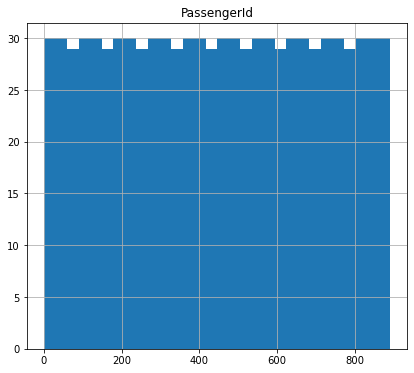

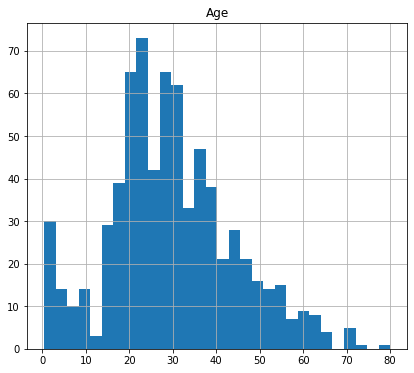

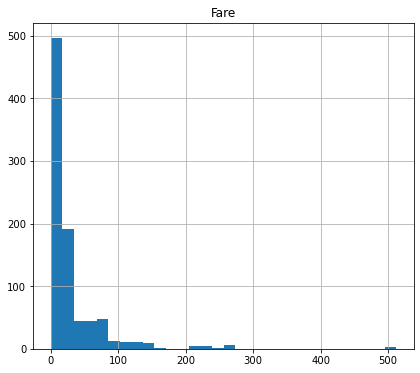

In [10]:
for col in numeric_cols:
    plot_histo(dataTrain, col)

#### 4. Variables con Nan

In [11]:
def getNanColNames(df):
    colnames=df.columns
    cols_con_nan=[]
    for col in colnames:
        if(df[col].isnull().sum()>0):
            cols_con_nan.append(col)
    return cols_con_nan

In [12]:
cols_con_nan=getNanColNames(dataTrain)
cols_con_nan

['Age', 'Cabin', 'Embarked']

In [14]:
dataTrain[cols_con_nan].isnull().mean()

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64